<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#23.-Плохая-обусловленность-метода-Кардано" data-toc-modified-id="23.-Плохая-обусловленность-метода-Кардано-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>23. Плохая обусловленность метода Кардано</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

 # 23. Плохая обусловленность метода Кардано

[Каханер–Моулер–Нэш]

Рассмотрим знаменитые формулы для решения кубического уравнения - формулы Кардано, которые правильнее было бы называть формулами Ферро-Тартальи-Кардано-Фиора.

Рассмотрим кубическое уравнение $y^3+ay^2+by+c=0$, где все коэффициенты и неизвестная $y$ в общем случае комплексные.

После замены $y = x-\frac{a}{3}$ в уравнении третьей степени $y^3+ay^2+by+c=0$ исчезает член с квадратом неизвестной $y$. Уравнение примет вид$$
x^3+px+q=0.
$$Его решения можно найти в виде$$
x=\alpha + \beta,
$$где $\alpha$, $\beta$ --- некоторые комплексные числа,$$
\alpha=\sqrt[3]{-\frac{q}{2}+\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}},
\qquad
\beta=\sqrt[3]{-\frac{q}{2}-\sqrt{\frac{q^2}{4}+\frac{p^3}{27}}}.
$$Среди всевозможных комбинаций $\alpha$, $\beta$, получаемых при подстановке всех значений корней кубических, необходимо выбрать лишь те, которые удовлетворяют условию $3\alpha\beta+p=0$. Легко видеть, что если $\alpha \ne 0$ и $\beta\ne 0$, то таким образом будет получено $3$ решения: для каждого из трех значений $\alpha$ можно определить единственное $\beta$.

Реализуйте метод Кардано для нахождения корней кубического уравнения $y^3+ay^2+by+c=0$. Написанная вами функция y1, y2, y3 = cardano(a,b,c) должна работать как для уравнений с вещественными, так и комплексными коэффициентами. Воспользуйтесь этим методом для нахождения вещественного корня уравнения$$
y^3 +3y^2 +\lambda^2y+3\lambda^2 = 0
$$при различных $\lambda$. Исследуйте потерю точности из-за ошибок округления при больших $\lambda$ (в частности, для $\lambda$ порядка величины, обратной машинному эпсилон).

Сравните результаты с теми, которые получаются методом Брента scipy.optimize.brentq и методом Ньютона scipy.optimize.newton.

**Эксперемнетальным методом я пришел к тому, что вещественный корень уравнения будет ровняться -3**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq, newton

Напишем функцию линейного уравнения

In [11]:
def func(x, l):
    return (x**3 + 3*x**2 + (l**2)*x + 3 * l**2)

Далее реализуем функцию нахождения корней уравния по методу Кардано

In [12]:
def cardano(a, b, c, d):
    c = c**2
    d = 3 * d**2
    p = (3*a*c - b**2)/(3*a**2)
    q = (2*b**3 - 9*a*b*c + 27*a**2*d)/(27*a**3)
        
    Q = (p/3)**3 + (q/2)**2
      
    #if Q > 0:
    A = np.cbrt(-(q/2) + np.sqrt(Q))
    B = np.cbrt(-(q/2) - np.sqrt(Q))
    
    x1 = A + B - b/(3*a)
    x2 = - (A + B)/2 + 0.5j * (A - B) * np.sqrt(3) - b/(3*a)
    x3 = - (A + B)/2 - 0.5j * (A - B) * np.sqrt(3) - b/(3*a)
    return x1


Постоим график погрешностей  метода Кардана

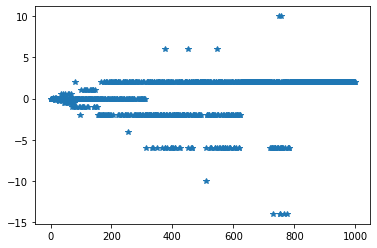

In [13]:
l = np.linspace(0, 10**17, 1000)

x_cardano = []

for labda in l:
    x_cardano.append(cardano(1, 3, labda, labda))
plt.plot(np.array(x_cardano) + 3, "*", label='Cardano')
#print(x_cardano)
pass


Постоим график погрешностей метода Ньютона

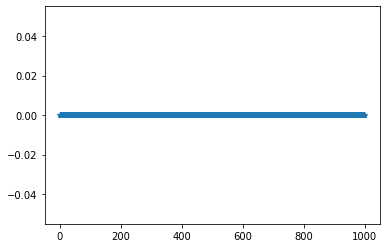

In [14]:
x_newton = []

for labda in l:
    x_newton.append(newton(func, -3, args=(labda,)))
plt.plot(np.array(x_newton) + 3, "*", label='Newton')
#print(x_newton)
pass


Постоим график погрешностей метода Брента

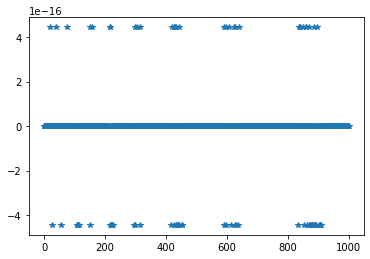

In [15]:
x_brent = []

for labda in l:
    x_brent.append(brentq(func, -4, -2, args=(labda,)))
plt.plot(np.array(x_brent) + 3, "*", label='Brent')
#print(x_brent)
pass


Поскольку в нашем случае метод Ньютона имеет нулевую погрешность будем сравнивать только метод Кардано и Брента.

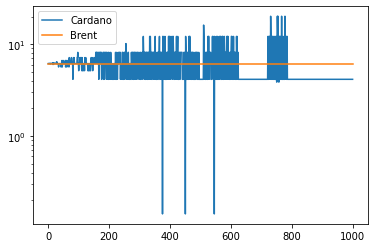

In [16]:
plt.semilogy(np.abs(np.array(x_cardano) - np.pi), label='Cardano')
plt.semilogy(np.abs(np.array(x_brent)  - np.pi), label='Brent')
plt.legend()
pass

# Вывод:
1) Метод кардано и правда имеет плохую обусловленность по сравнению с методом Ньютона и Брента

2) Округление больших коэффициентов больше чем 10^16 перестает функционировать